In [522]:

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [523]:
df = pd.read_csv(r"D:\MLProjects\ZDatasets\AirlineData\data\Data_Train.csv")
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [524]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [525]:

condtion = df['Route'].isnull()==True
df[condtion]



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [526]:
condtion = df['Total_Stops'].isnull()==True
df[condtion]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [527]:
# replace missing Value of Route using Mode as Route is categorical COlumn
modeOfRoute = df['Route'].mode()[0]
modeOfRoute

df['Route'].fillna(modeOfRoute,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [528]:
# replace missing Value of Total_Stops using Mode as Total_Stops is categorical COlumn
modeOfTotal_Stops = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modeOfTotal_Stops,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [529]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [530]:
# Size of the Data
df.shape


(10682, 11)

In [531]:
# View of the Data
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [532]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [533]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [534]:
# how mathematically look like?
df.describe()


,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [535]:
df.duplicated().sum()



220

In [536]:
df.drop_duplicates(inplace=True)


In [537]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<Axes: >

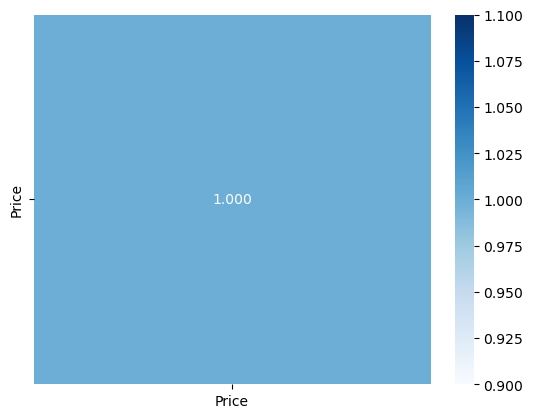

In [538]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [539]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [540]:
print(df['Airline'].value_counts())


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [541]:
#counts/Unique


# Multiple carriers Premium economy with the Multiple carriers
# Jet Airways Business with Jet Airways
# Vistara Premium economy Vistara 

df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)
df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)
print("----------------------")
print(df['Airline'].value_counts())


----------------------
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


In [542]:
df['Source'].value_counts()


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [543]:
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [544]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [545]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [546]:
# Know the Value counts of the categorical Data.

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()


Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL ? BOM ? COK          2377
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64


2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
36h 25m      1
30h 25m      1
30h 15m

In [547]:
# Graph based Analyis


In [548]:
# Count Plot , count of the specified feature



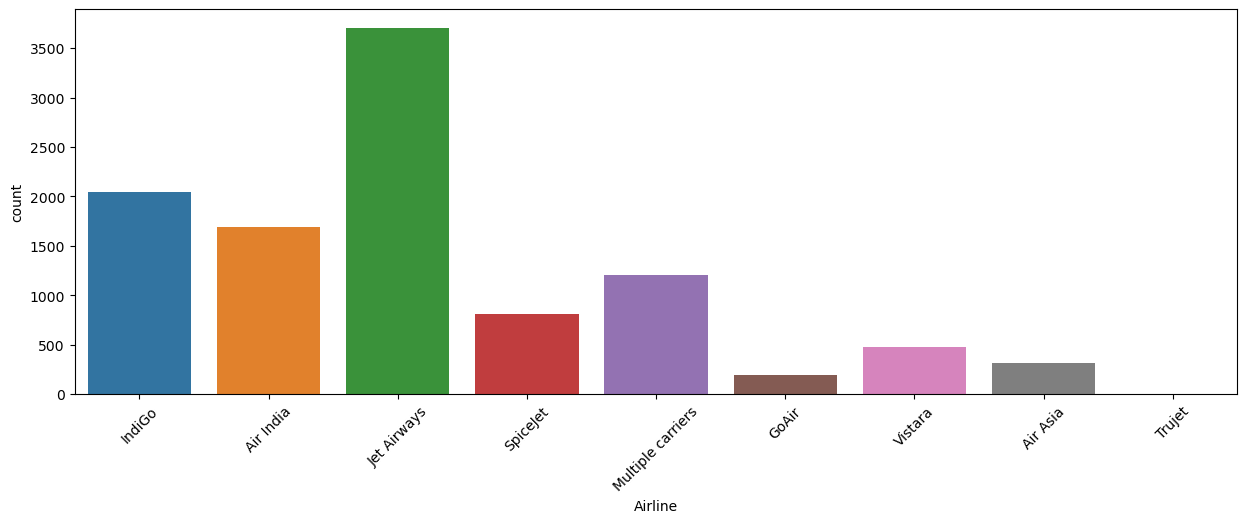

In [549]:
# Airline
# Jet Airways has the maximum flying While Truejest has the least
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


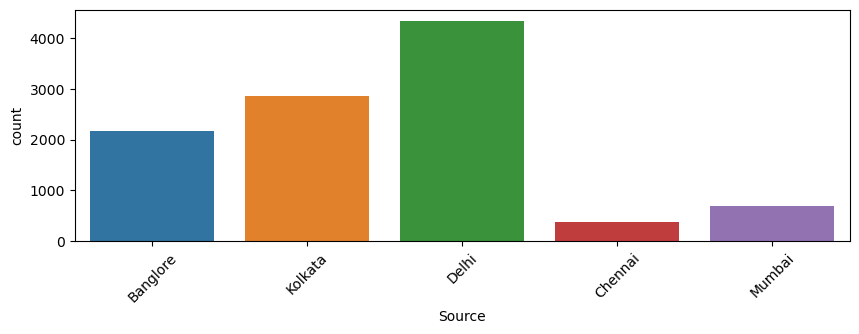

In [550]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(10,3))
sns.countplot(x=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


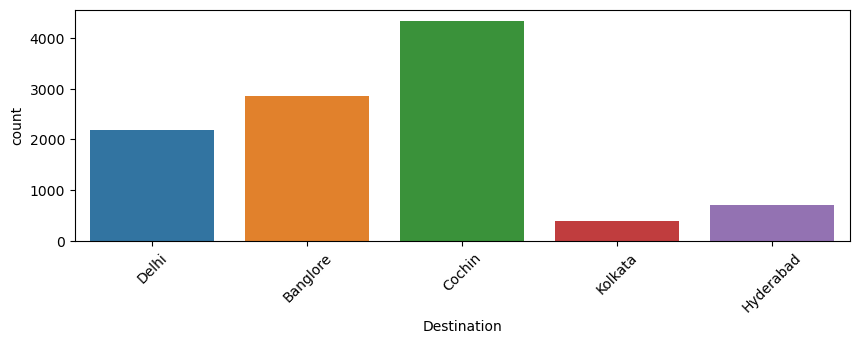

In [551]:
# Destination
# Coachin has the maximum Arrivals
plt.figure(figsize=(10,3))
sns.countplot(x=df['Destination'])
plt.xticks(rotation=45) 
plt.show() 


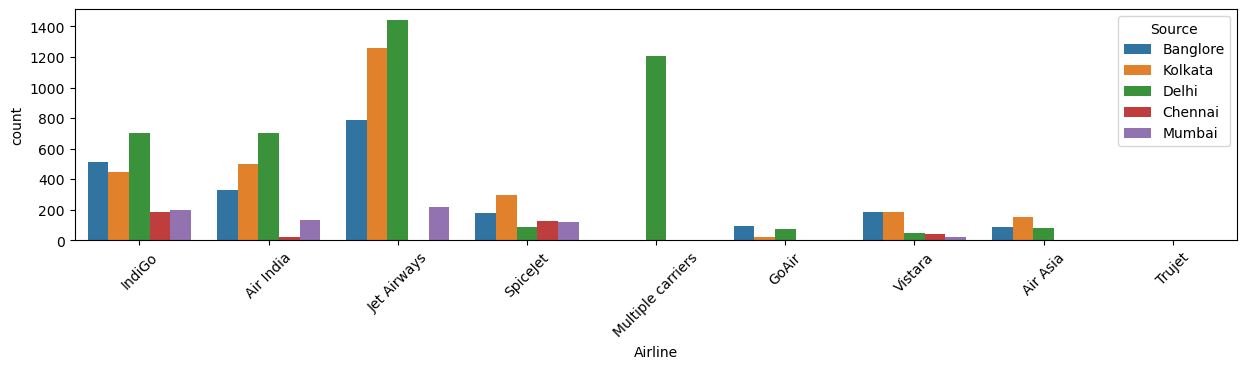

In [552]:
# multivariate Analysis
plt.figure(figsize=(15,3))
sns.countplot(x=df['Airline'],hue=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


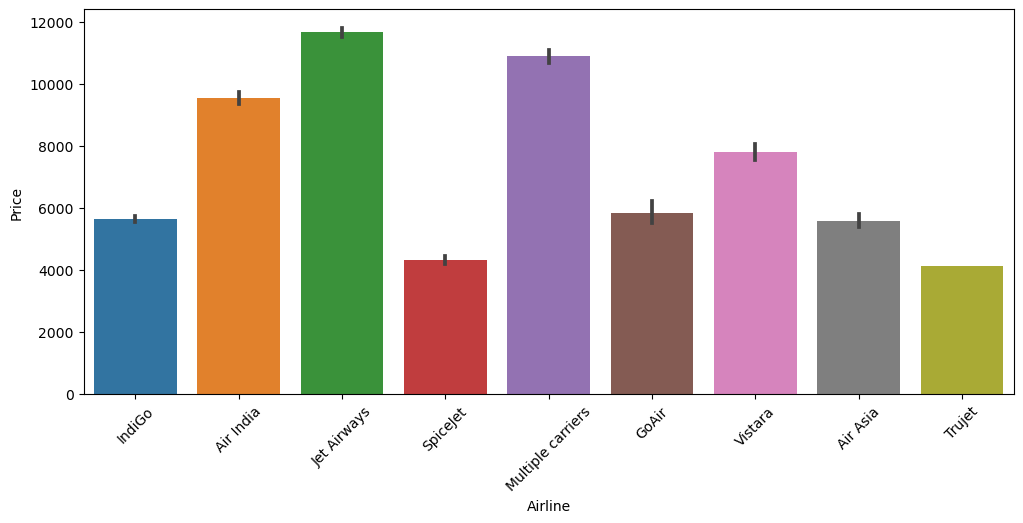

In [553]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


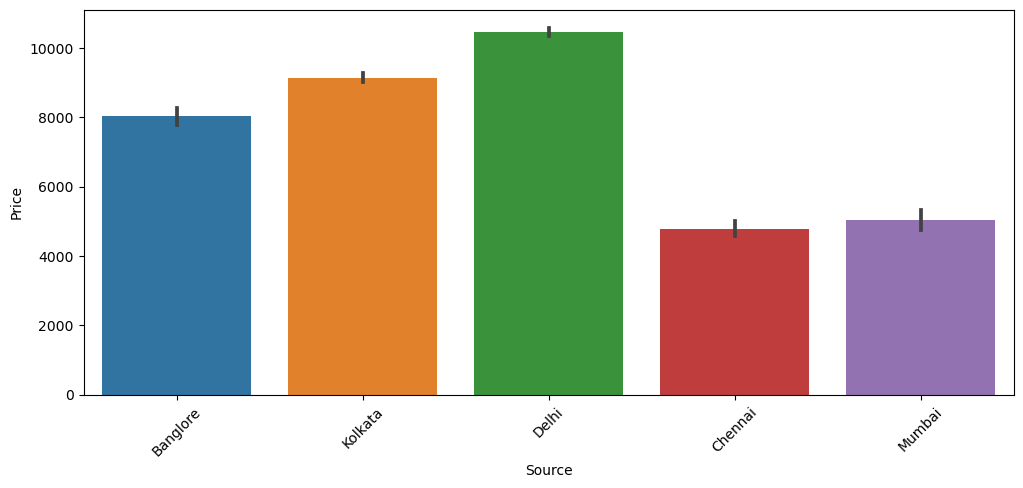

In [554]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Source'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1000x1000 with 0 Axes>

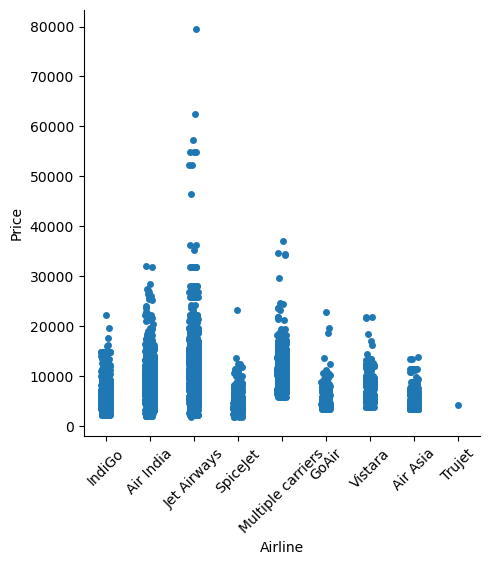

In [555]:
plt.figure(figsize=(10,10))
sns.catplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


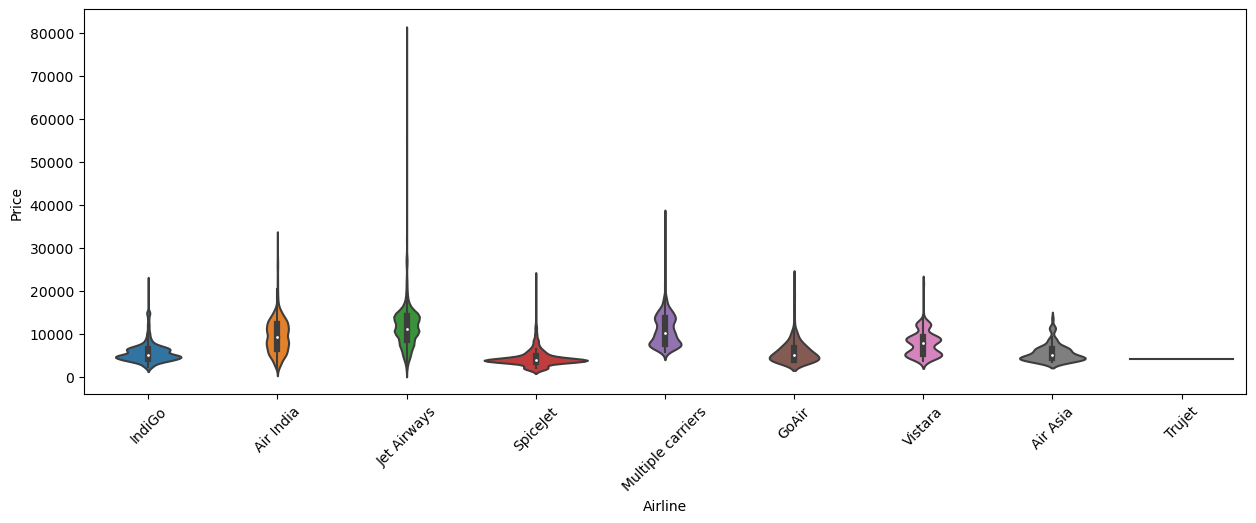

In [556]:

plt.figure(figsize=(15,5))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


In [557]:
'''
plt.figure(figsize=(15,5))
sns.swarmplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 

'''

"\nplt.figure(figsize=(15,5))\nsns.swarmplot(x=df['Airline'],y=df['Price'])\nplt.xticks(rotation=45) \nplt.show() \n\n"

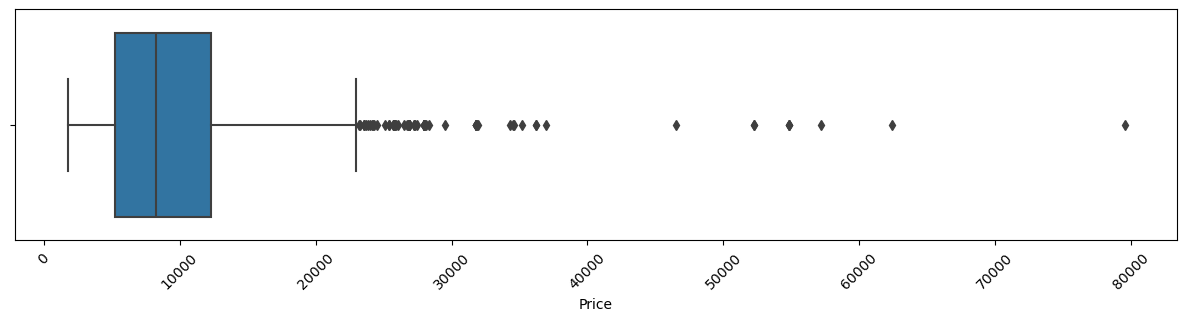

In [558]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



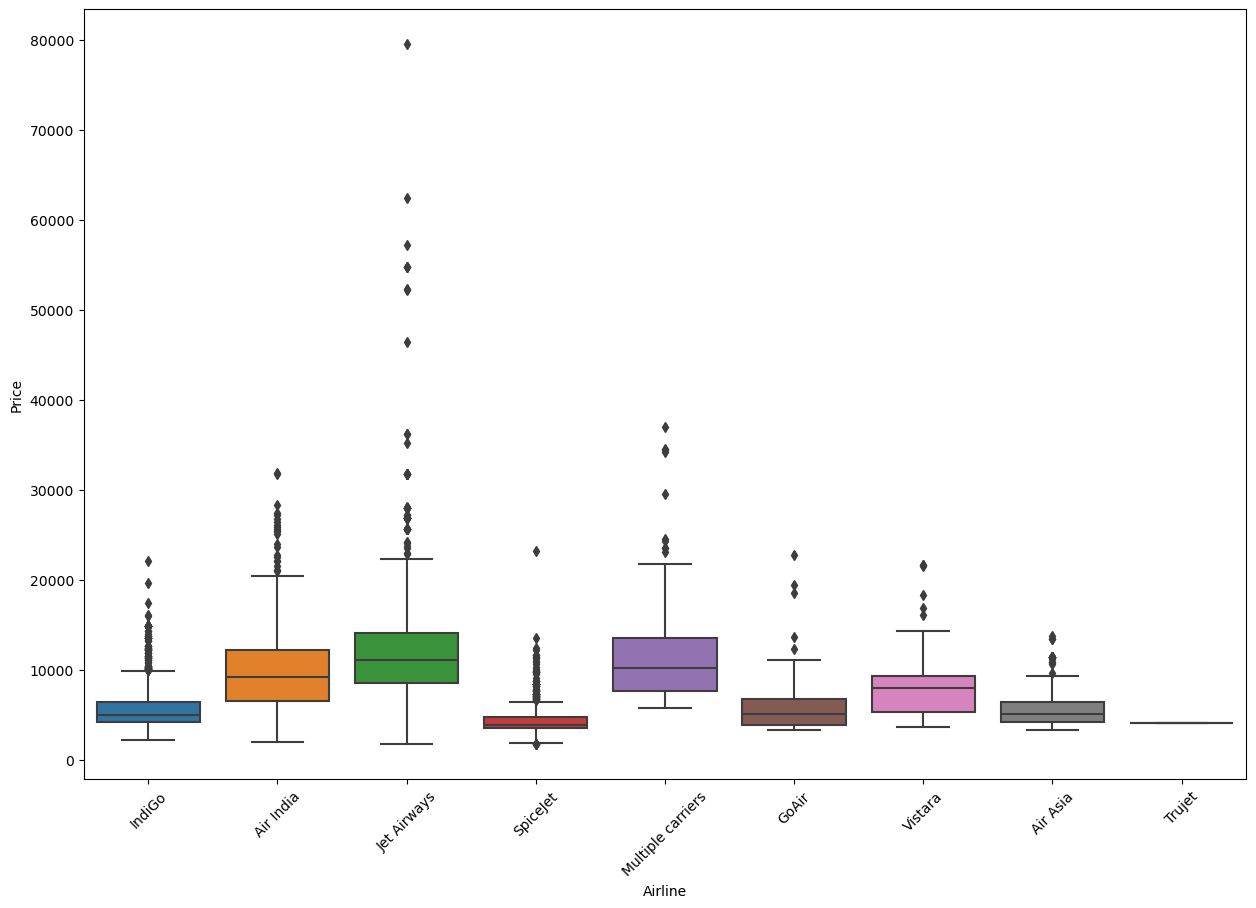

In [559]:
# Outlier Detection

plt.figure(figsize=(15,10))
sns.boxplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Axes: xlabel='Price', ylabel='Density'>

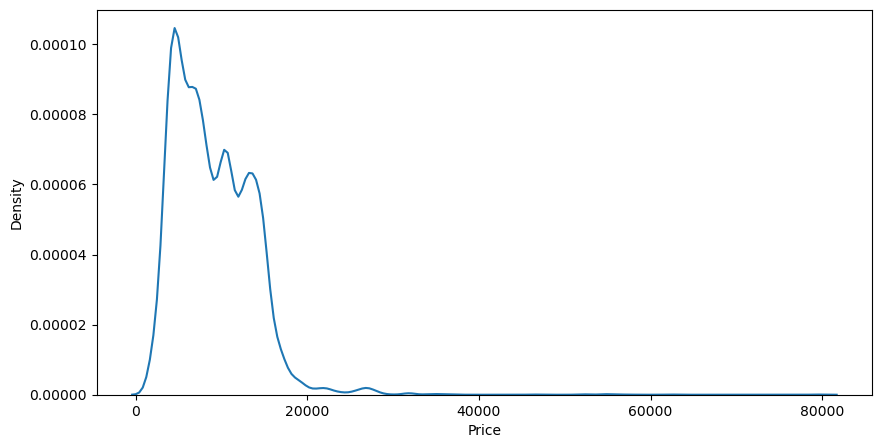

In [560]:

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

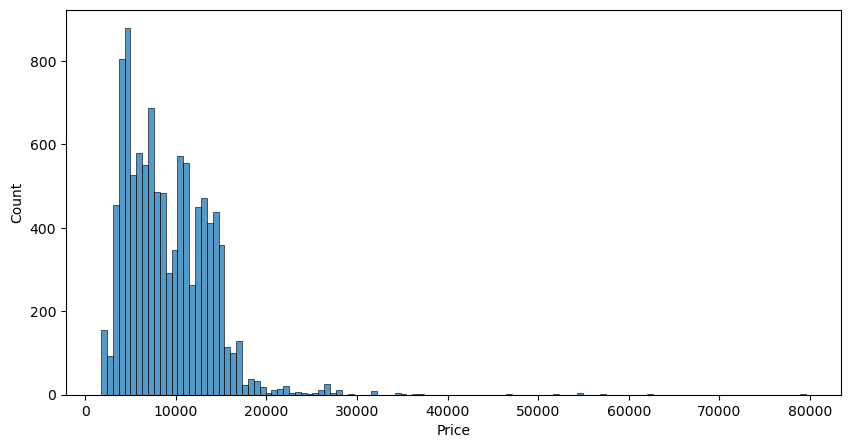

In [561]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

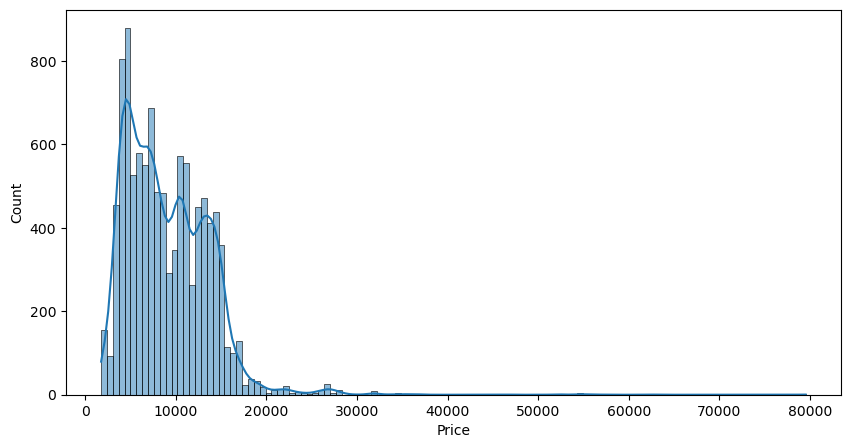

In [562]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'],kde=True)


In [563]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,01-06-2019,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24-06-2019,Chennai,Kolkata,MAA ? CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,03-03-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,16:40,04-03-2023 19:15,26h 35m,2 stops,No info,14011
18,Air India,12-06-2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13-06-2023 19:15,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12-05-2019,Kolkata,Banglore,CCU ? IXR ? DEL ? BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,06-06-2019,Mumbai,Hyderabad,BOM ? HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,09-06-2019,Mumbai,Hyderabad,BOM ? HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145


In [564]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[0]+1)
    

1
2
3
4
5
6
7
8
9


In [565]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [566]:
listOfAirline = list(enumerate(df['Airline'].unique()))
listOfAirline


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

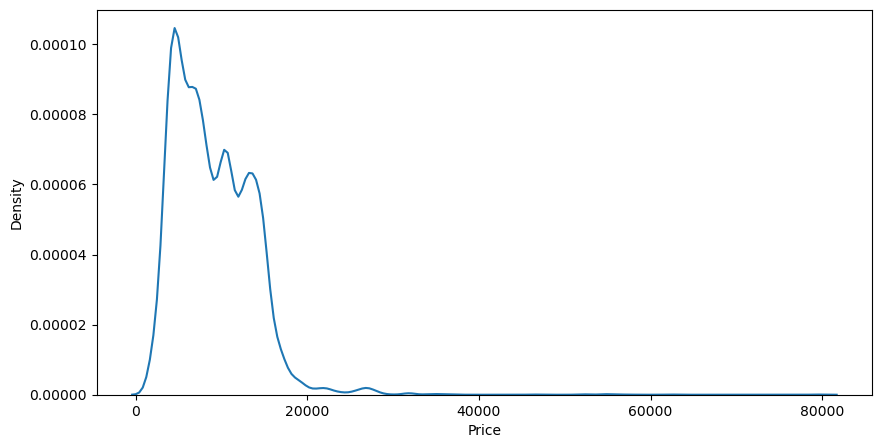

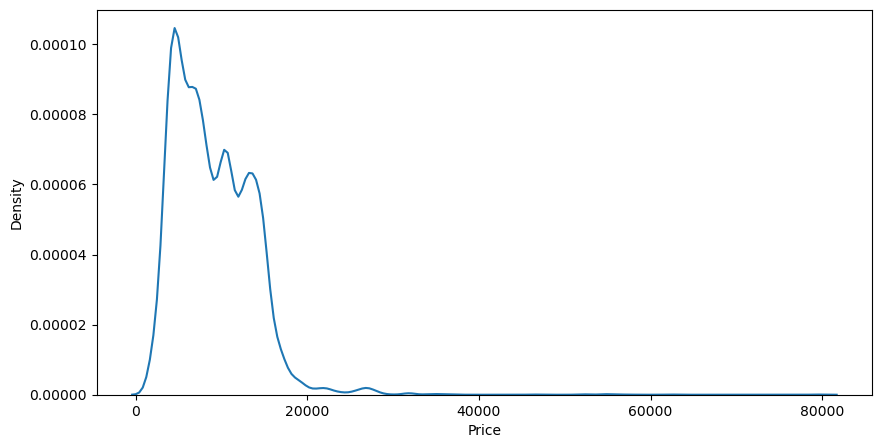

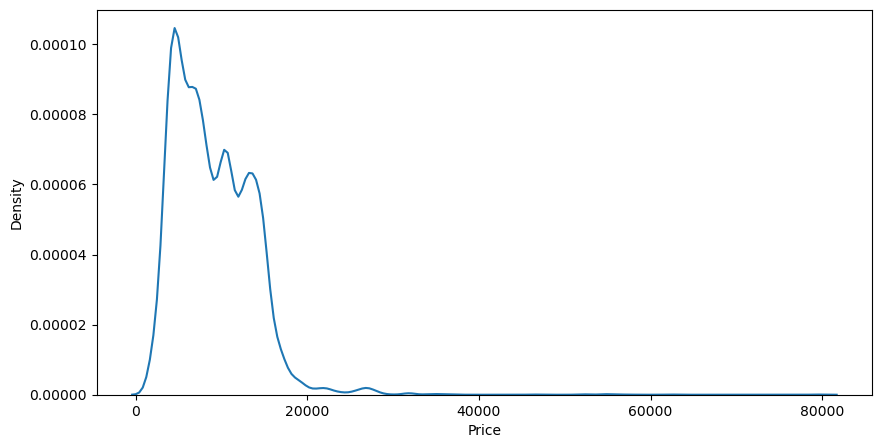

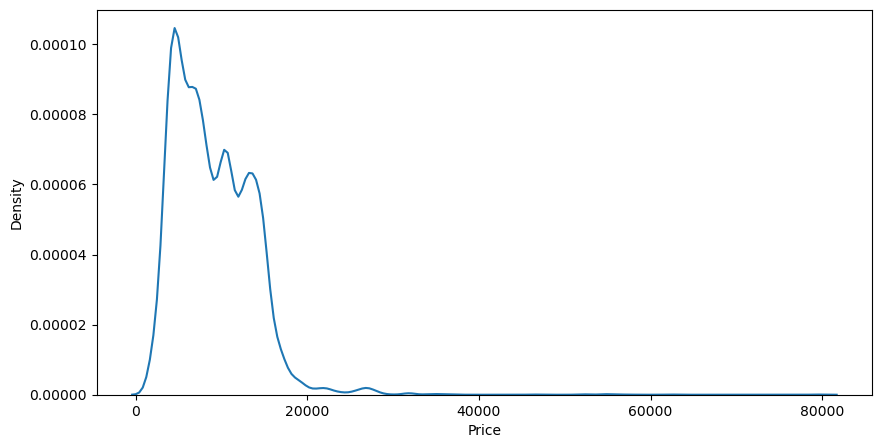

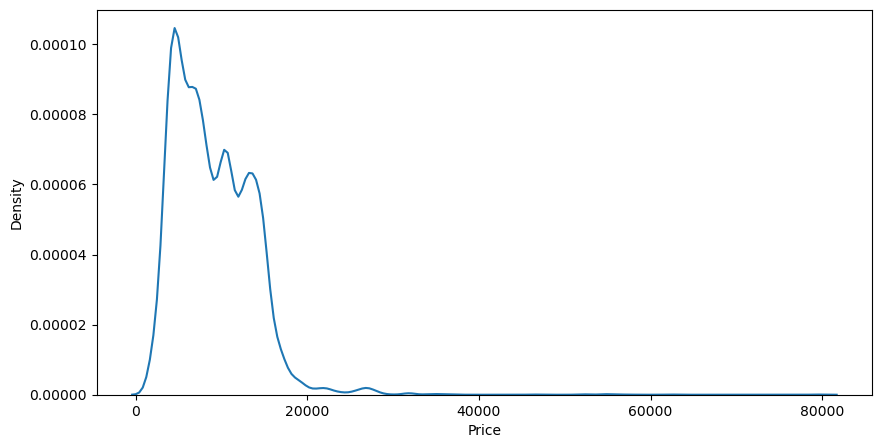

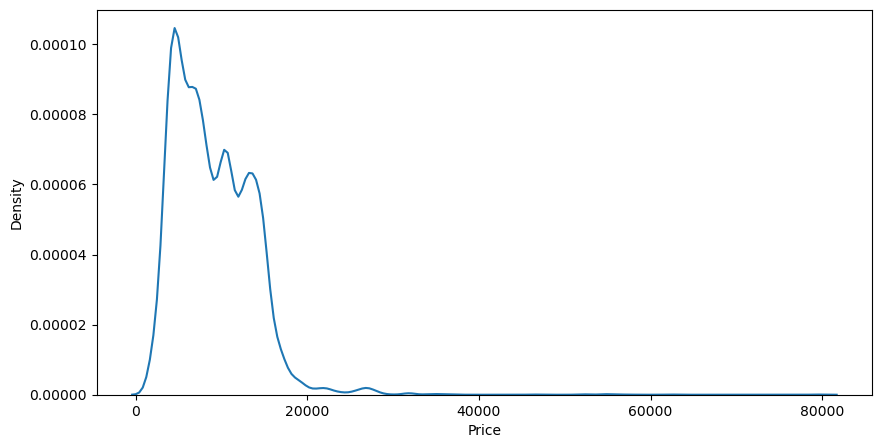

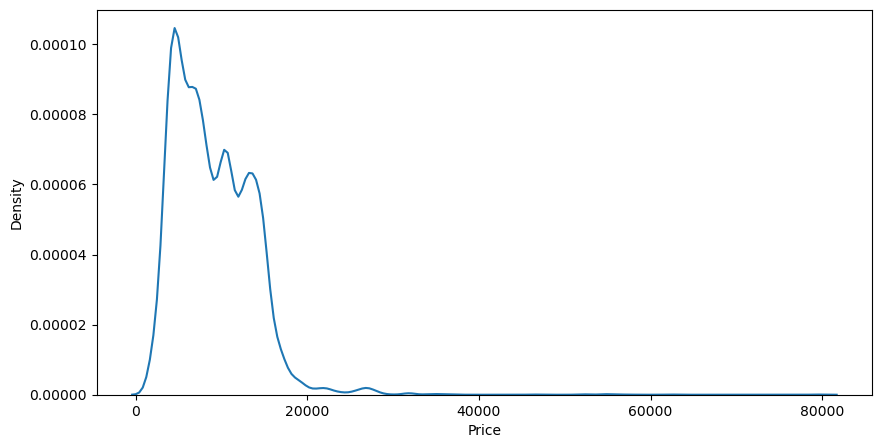

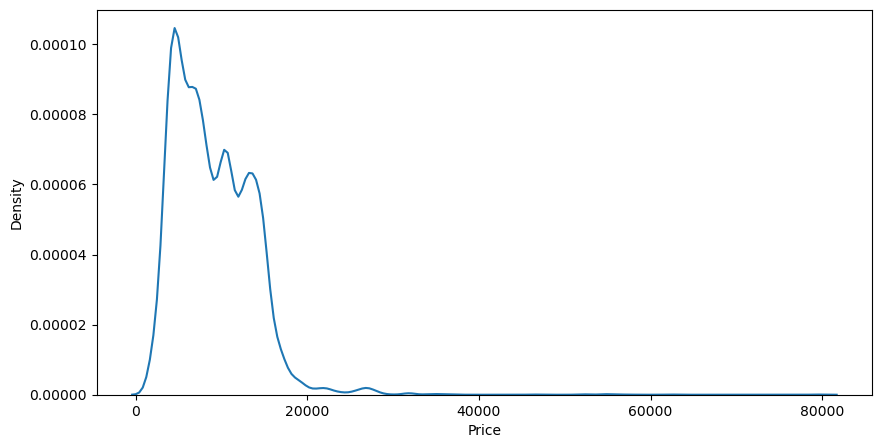

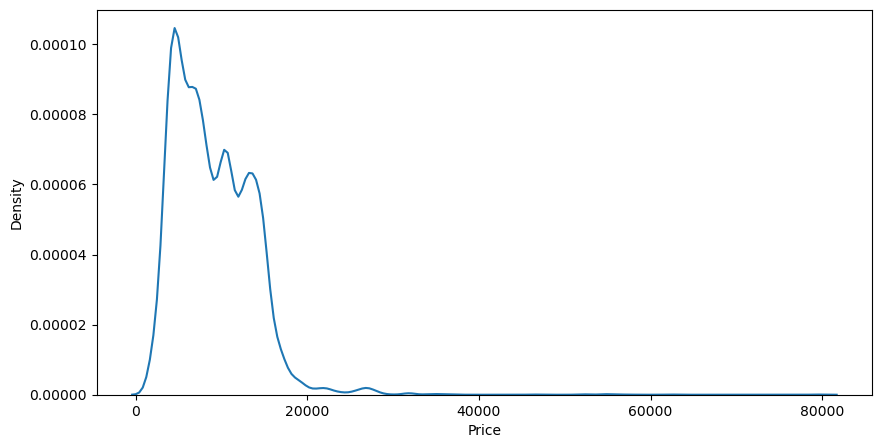

In [567]:
for i in listOfAirline:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df['Price'])

    


In [568]:
df[df['Airline']=='Jet Airways']



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
6,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,18:55,13-03-2023 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:00,02-03-2023 05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:55,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087
13,Jet Airways,09-05-2019,Kolkata,Banglore,CCU ? BOM ? BLR,21:10,10-05-2023 09:20,12h 10m,1 stop,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...,...,...
10665,Jet Airways,12-06-2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,13-06-2023 19:00,24h 45m,1 stop,In-flight meal not included,10262
10666,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,22:55,13-03-2023 20:20,21h 25m,1 stop,In-flight meal not included,11087
10667,Jet Airways,09-05-2019,Delhi,Cochin,DEL ? JDH ? BOM ? COK,11:40,19:00,7h 20m,2 stops,No info,21219
10673,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,20:35,13-03-2023 21:20,24h 45m,1 stop,In-flight meal not included,11087


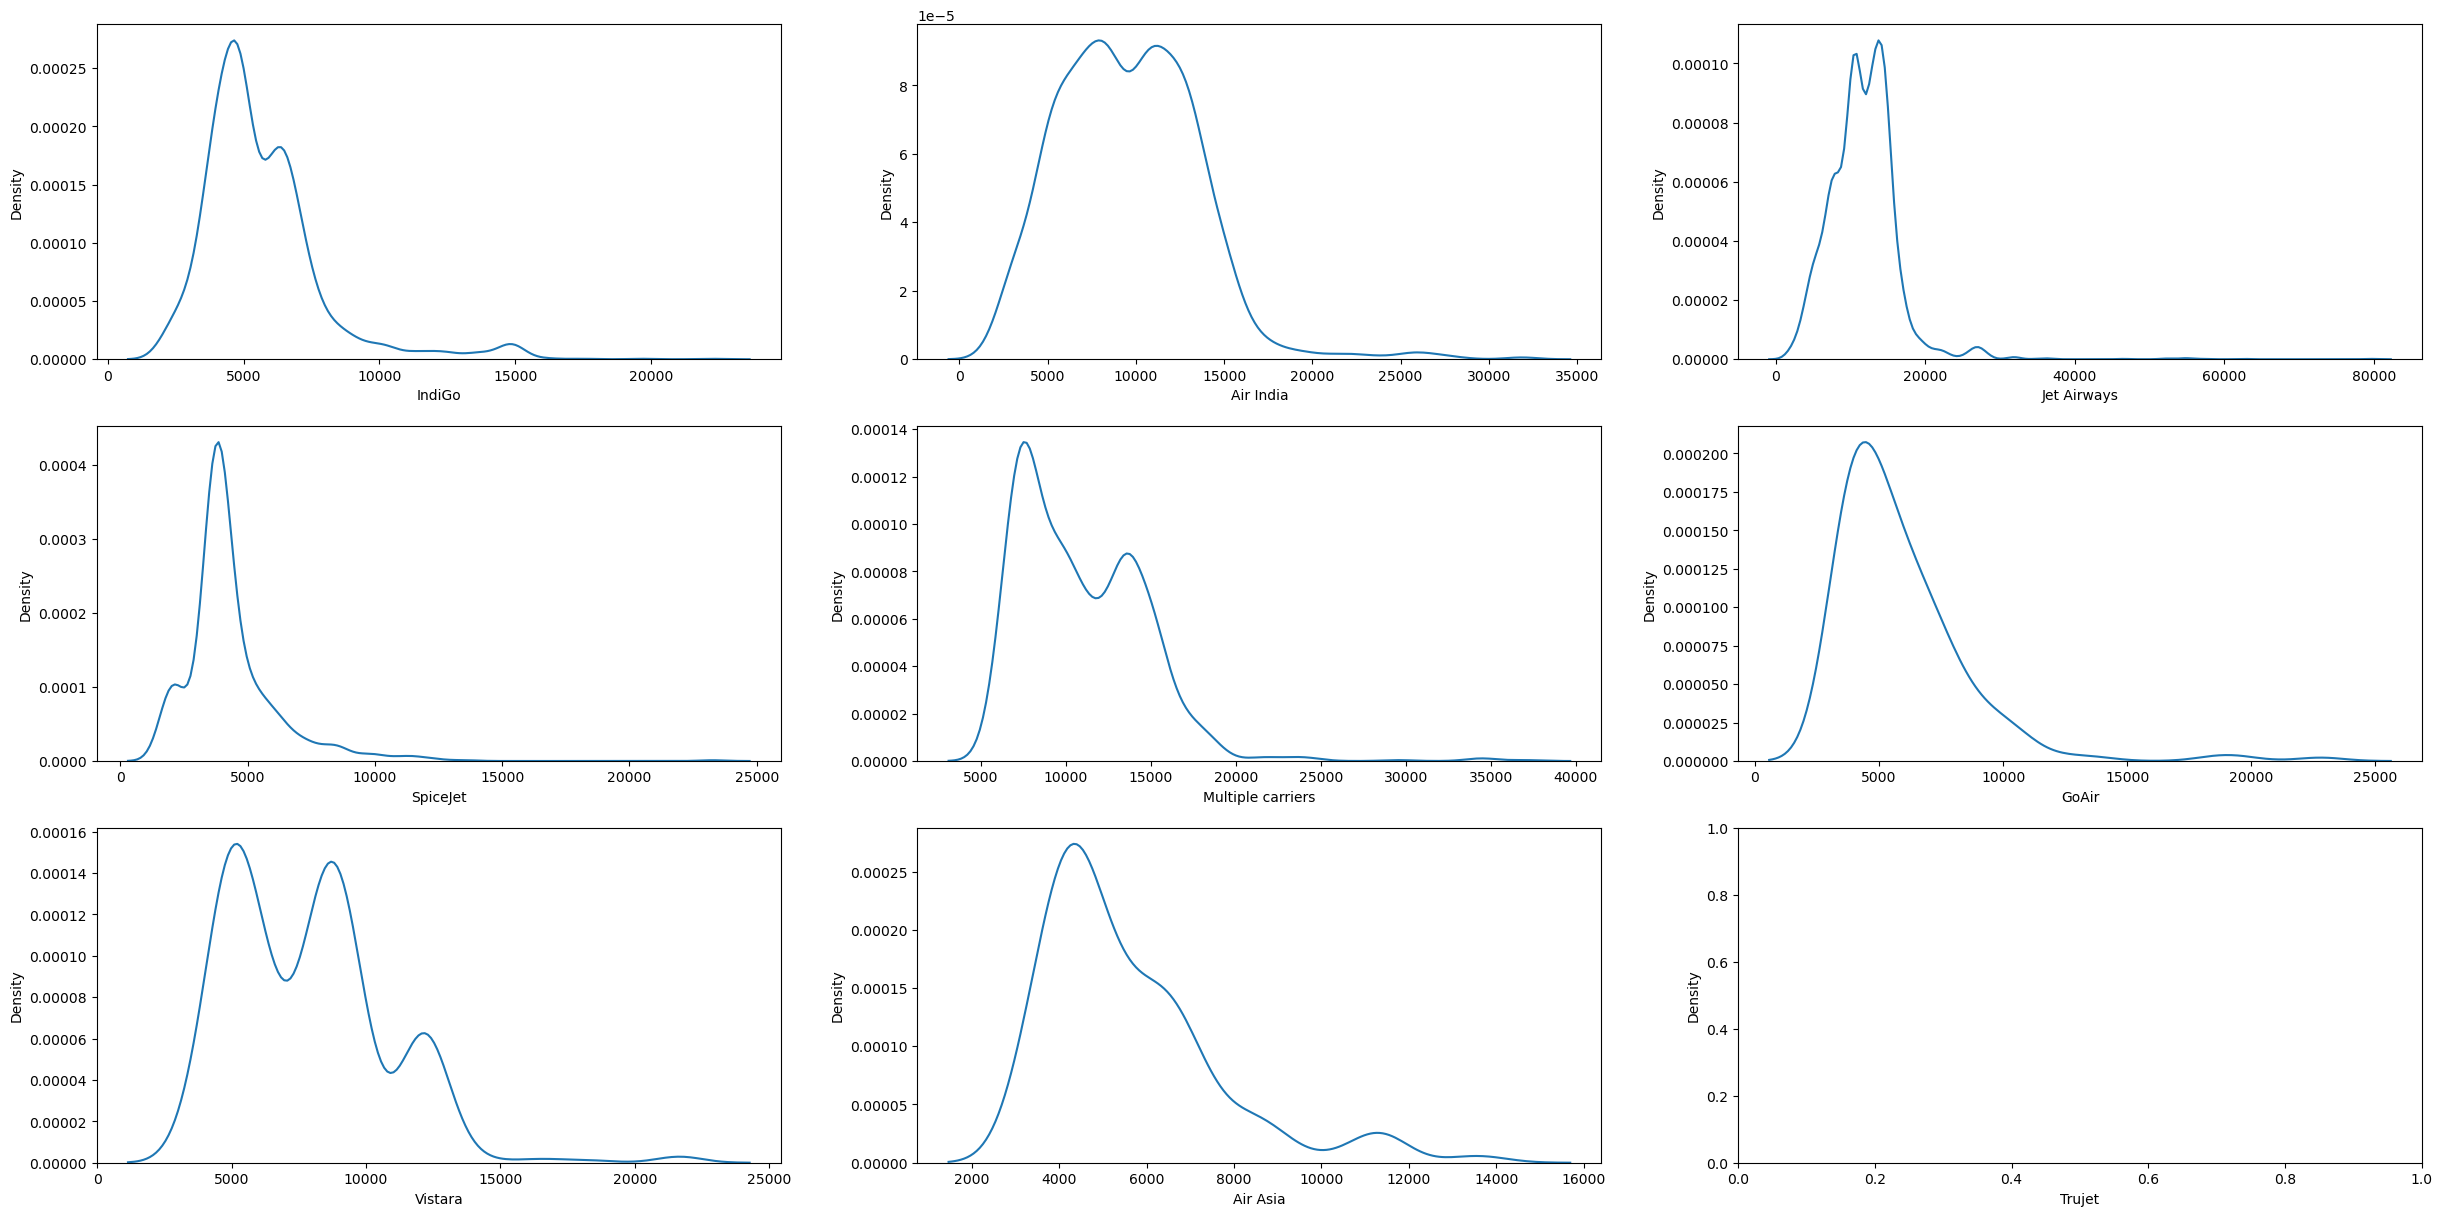

In [569]:
'''[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]'''



plt.figure(figsize=(30,20))

for i in listOfAirline:
    plt.subplot(4,3,i[0]+1)

    indi = df[df['Airline']==i[1]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 


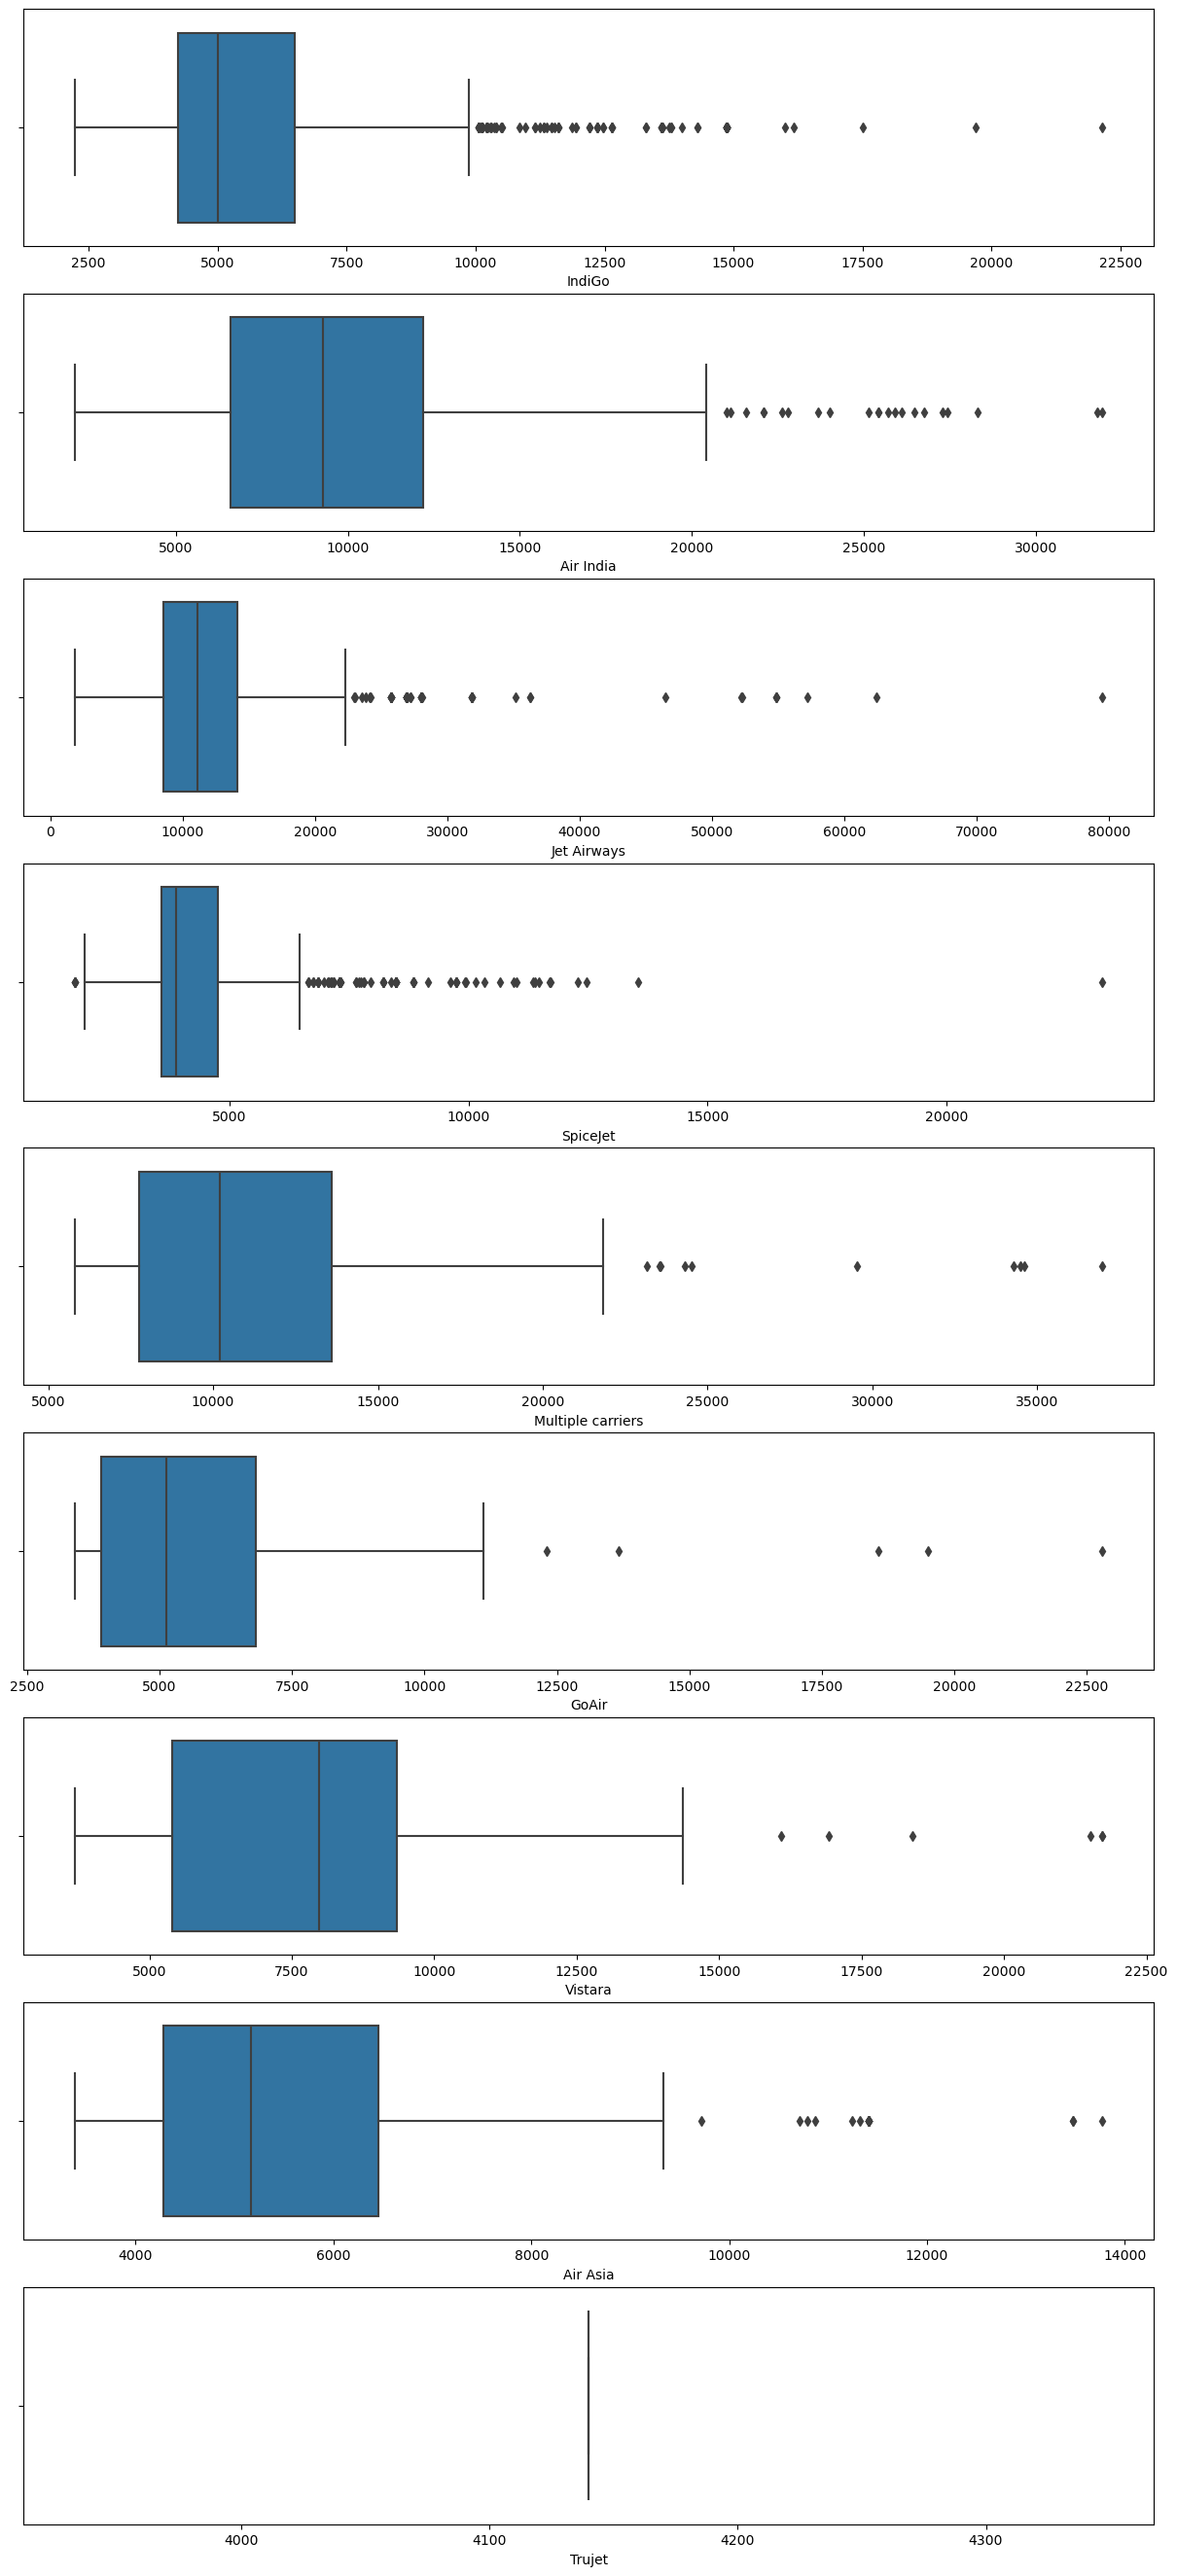

In [570]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



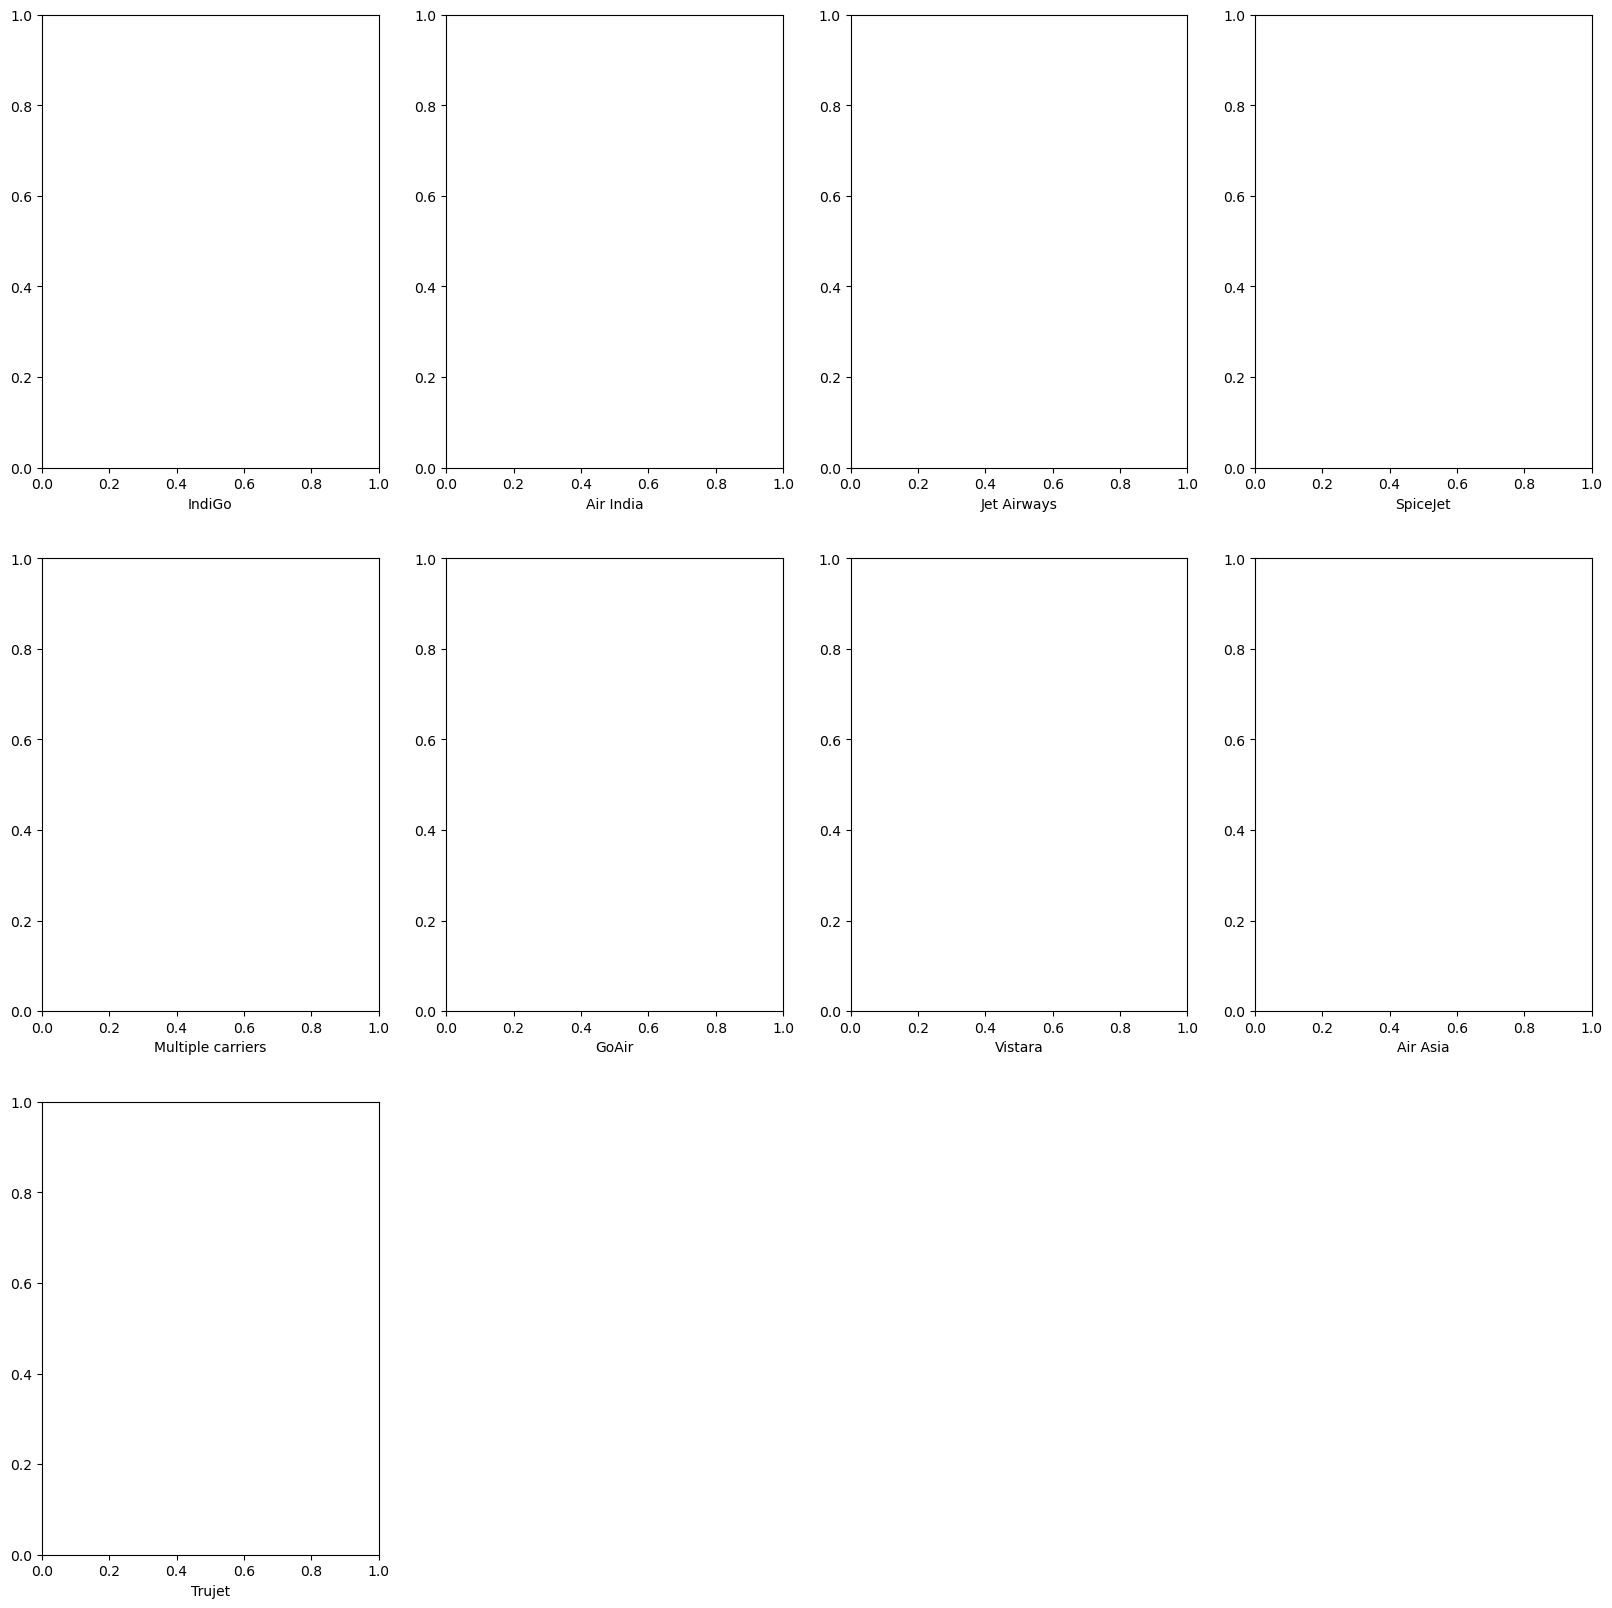

In [571]:
plt.figure(figsize=(20,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==i[0]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [572]:

df['Date_of_Journey']

# Day
# Month
# Year


0        24-03-2019
1        01-05-2019
2        09-06-2019
3        12-05-2019
4        01-03-2019
            ...    
10677    09-04-2019
10678    27-04-2019
10679    27-04-2019
10680    01-03-2019
10681    09-05-2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [573]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d-%m-%Y").dt.day

df['Day']


0        24
1         1
2         9
3        12
4         1
         ..
10677     9
10678    27
10679    27
10680     1
10681     9
Name: Day, Length: 10462, dtype: int64

In [574]:
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.month
df['Month']


0        3
1        5
2        6
3        5
4        3
        ..
10677    4
10678    4
10679    4
10680    3
10681    5
Name: Month, Length: 10462, dtype: int64

In [575]:
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.year
df['Year']


0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10677    2019
10678    2019
10679    2019
10680    2019
10681    2019
Name: Year, Length: 10462, dtype: int64

In [576]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [577]:

columName = 'Dept_Hour'
columName = columName.split("_")[0]
df[columName+"_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df[columName+"_Hour"]

df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,22
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,9
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11


In [578]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time



In [579]:


df['Dept_Hour'] = pd.to_datetime(df['Dep_Time']).dt.minute
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30


In [580]:
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30


In [581]:
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55,22
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45,23
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20,11
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30,14


In [582]:
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1,10
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13,15
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23,30
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21,35


In [583]:


# 7h 25m
horsToMin = 7*60
horsToMin = horsToMin + 25
horsToMin


445

In [584]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [585]:
df['Duration'].unique()


array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [586]:
values = "50m"
values = values.split(" ")
values


['50m']

In [587]:
df['Duration'].unique()


FirstValue = "2h 55m"

FirstValue = FirstValue.split(" ")[0]
print(FirstValue)

if "h" in FirstValue:
    FirstValue = FirstValue.replace("h","")
    FirstValue = int(FirstValue)*60
    print(FirstValue)

elif 'm' in FirstValue:
    FirstValue = FirstValue.replace('m',"")
    FirstValue = int(FirstValue)
    print(FirstValue)



2h
120


In [588]:
SecondValue = "2h 55m"

SecondValue = SecondValue.split(" ")[1]
print(SecondValue)

SecondValue = SecondValue.replace('m',"")
SecondValue = int(SecondValue)
print(SecondValue)




55m
55


In [589]:
df["hoursMinutes"] = 0
for i in df.index:
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df





,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1,10,170
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23,30,325
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55,22,25,150
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20,11,20,180
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30,14,10,160


In [590]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

df



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,20,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,2019,5,5,23,30,325
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,9,4,2019,55,55,22,25,150
10678,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,27,4,2019,20,20,11,20,180
10680,Vistara,Banglore,Delhi,BLR ? DEL,non-stop,No info,12648,1,3,2019,30,30,14,10,160


In [591]:
df = df.drop(["Route","Additional_Info"], axis = 1)
df


,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,2019,20,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,5,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,55,55,22,25,150
10678,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,20,20,11,20,180
10680,Vistara,Banglore,Delhi,non-stop,12648,1,3,2019,30,30,14,10,160


In [592]:
df = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [593]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [594]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [595]:
# target Feature
y = data_train['Price']
y.head()



0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [596]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [597]:
'''airDataSet = df[df['Airline']=="IndiGo"]
airDataSet


plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.70)

print(q1)
print(q3)
IQR = q3-q1
print(IQR)

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5

print("lowerLimit: ",lowerLimit)
print("upperLimit: ", upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index


airDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)
airDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)

airDataSet

plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

'''

'airDataSet = df[df[\'Airline\']=="IndiGo"]\nairDataSet\n\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\nq1 = airDataSet[\'Price\'].quantile(0.25)\nq3 = airDataSet[\'Price\'].quantile(0.70)\n\nprint(q1)\nprint(q3)\nIQR = q3-q1\nprint(IQR)\n\nlowerLimit = q1-IQR*1.5\nupperLimit = q3+IQR*1.5\n\nprint("lowerLimit: ",lowerLimit)\nprint("upperLimit: ", upperLimit)\n\nlowerLimitIndex = airDataSet[airDataSet[\'Price\']<=lowerLimit].index\nupperLimitIndex = airDataSet[airDataSet[\'Price\']>=upperLimit].index\n\n\nairDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)\nairDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)\n\nairDataSet\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\n'

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
10549,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
10589,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


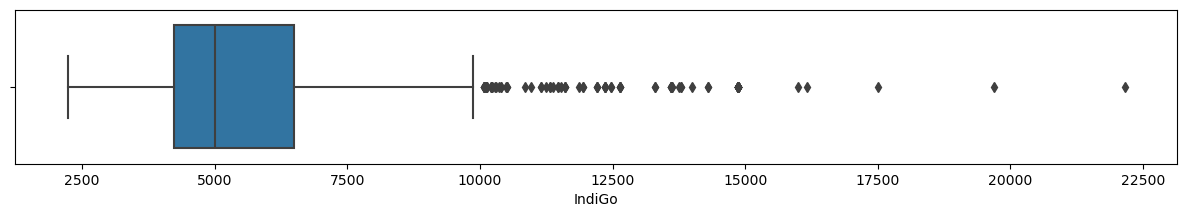

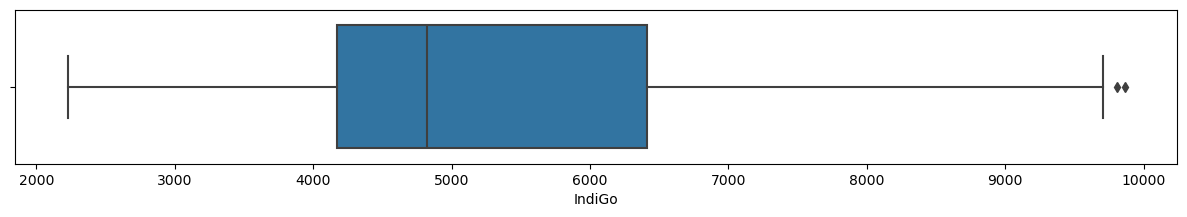

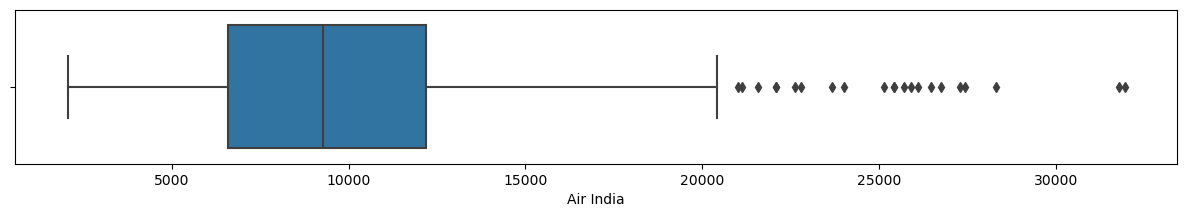

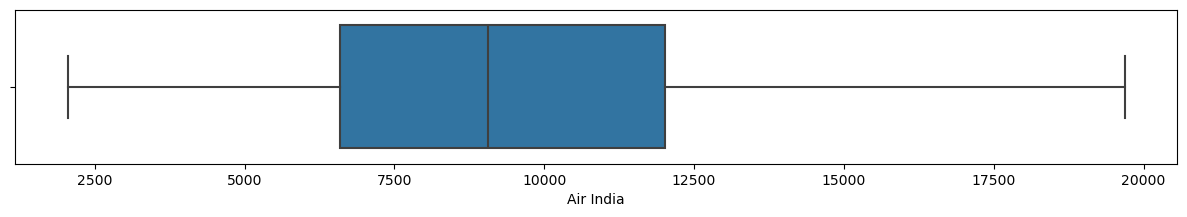

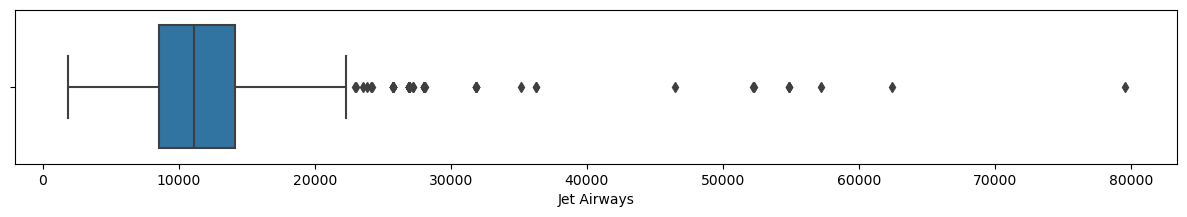

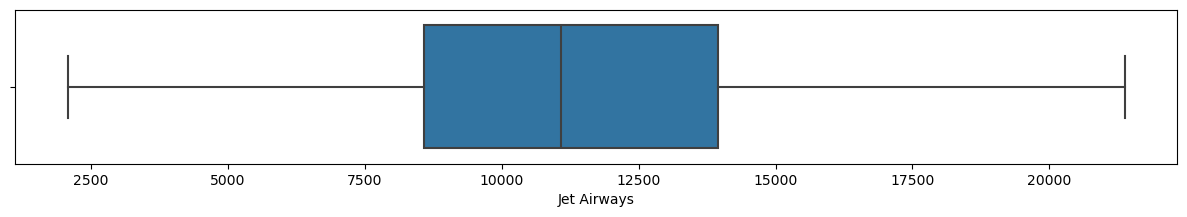

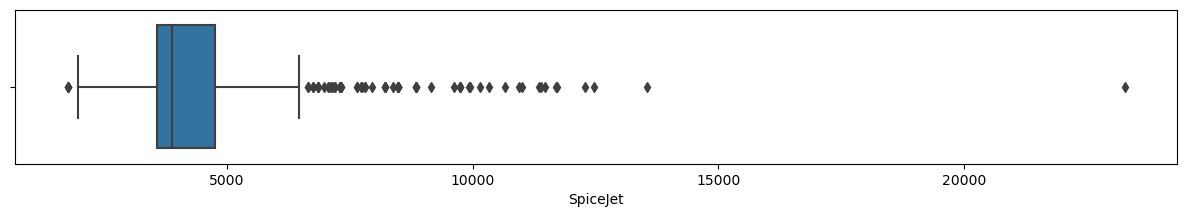

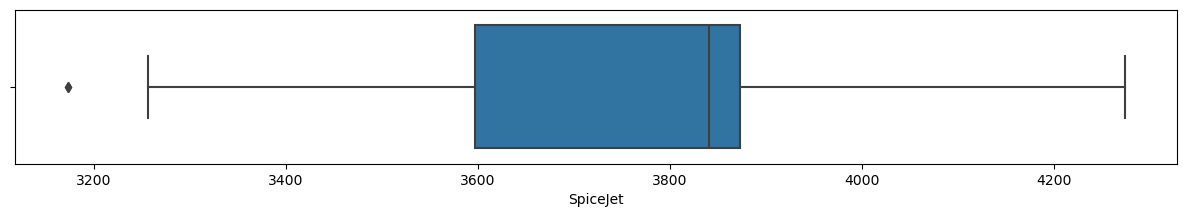

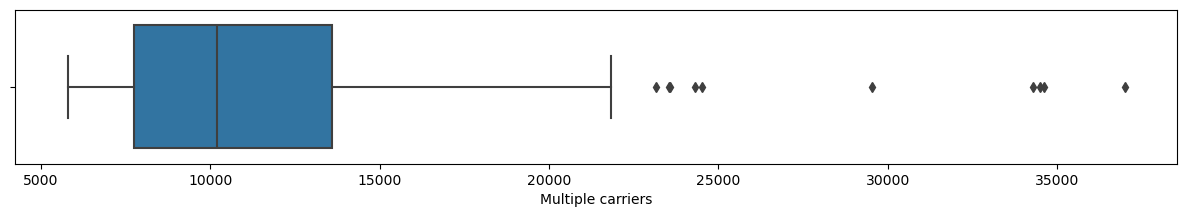

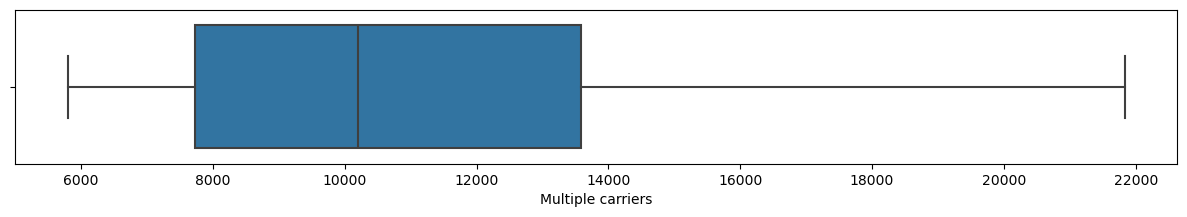

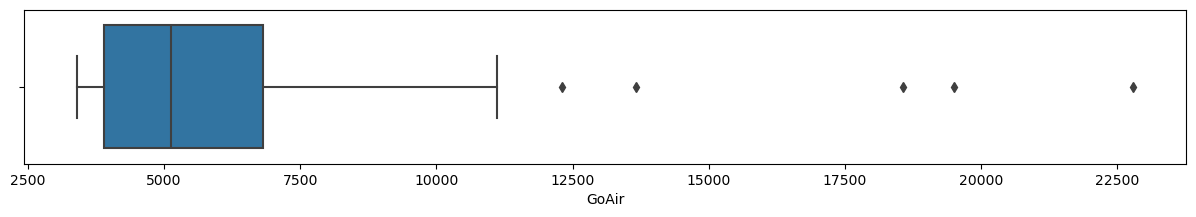

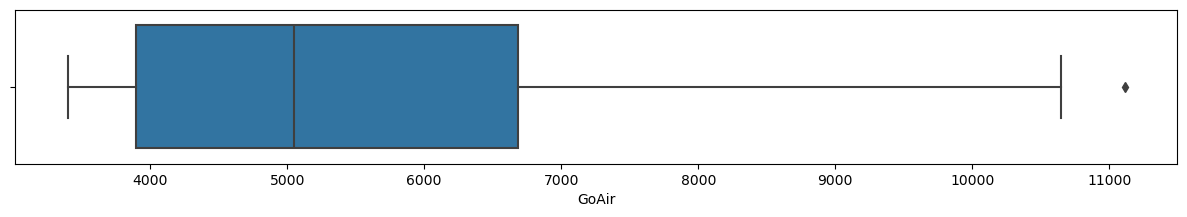

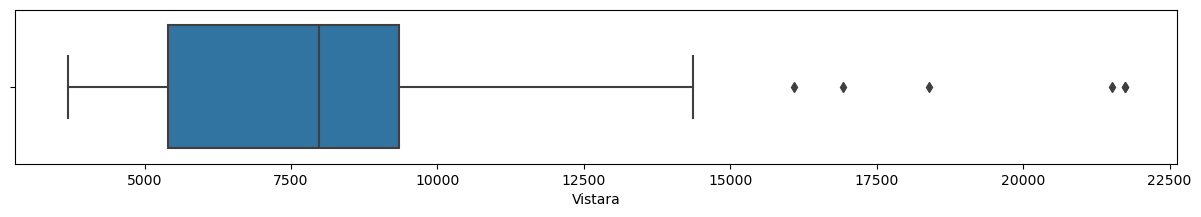

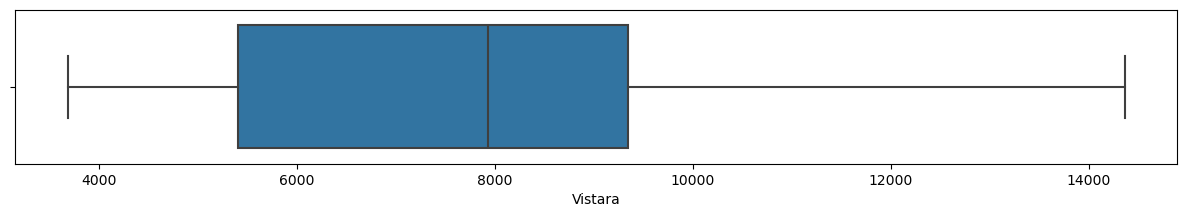

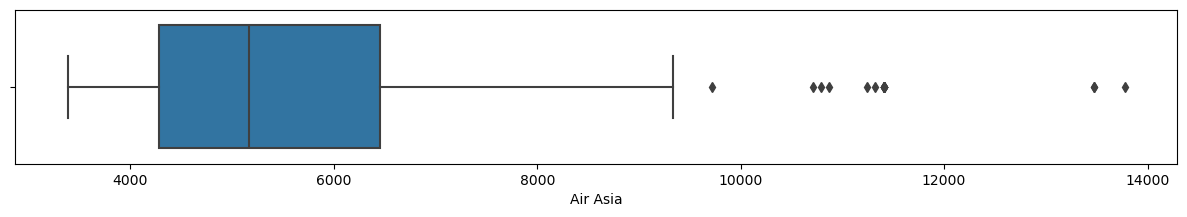

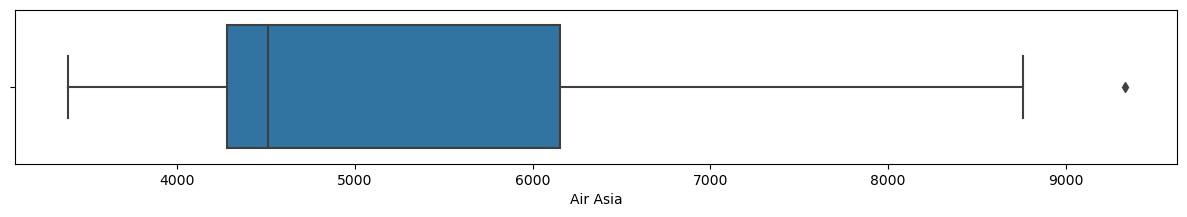

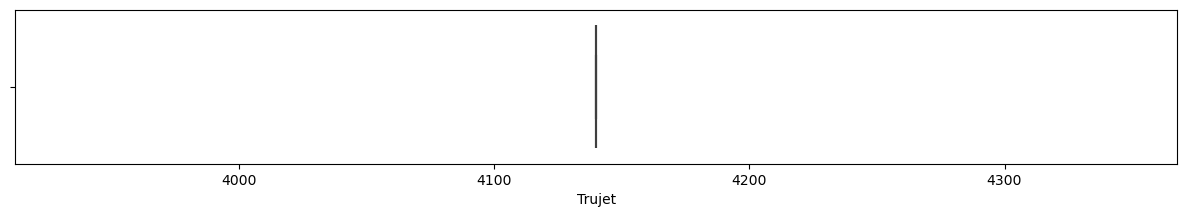

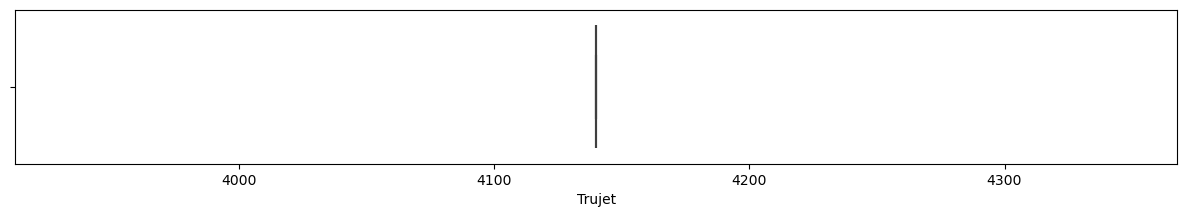

In [598]:
# Remove Outlier


df['Airline'].unique()

airlineName = { 'IndiGo':      [0.25,0.75],
                "Air India":   [0.27,0.75],
                'Jet Airways': [0.27,0.75],
                'SpiceJet':    [0.20,0.45],
                'Multiple carriers':[0.20,0.80],
                'GoAir':       [0.20,0.75],
                'Vistara':     [0.20,0.75],
                'Air Asia':    [0.25,0.75],
                'Trujet':       [0,0]

              }


final_df = pd.DataFrame(columns=list(df.columns))
final_df
list(df.columns)

import pandas as pd


for key,value in airlineName.items():
    airDataSet = ""
    airDataSet = df[df['Airline'] == key]
    airDataSet
    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)
    q1 = airDataSet['Price'].quantile(value[0])
    q3 = airDataSet['Price'].quantile(value[1])
    IQR = q3-q1
    lowerLimit = q1-IQR*1.5
    upperLimit = q3+IQR*1.5
    lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
    upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index
    if airDataSet.shape[0] > 5 : 
        airDataSet.drop(lowerLimitIndex,axis=0,inplace=True)
        airDataSet.drop(upperLimitIndex,axis=0,inplace=True)
    else:
        pass

    df[df.index.isin([2878])]

    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)

    
    #airDataSet1 = airDataSet1.append(airDataSet, ignore_index=True)  # ignore_index=True resets the index

    final_df = pd.concat([final_df, airDataSet], axis=0)  # axis=0 is the default and means appending vertically


    
final_df


In [599]:
final_df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
10549,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
10589,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


In [600]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160


In [601]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


'''X_train = X_train.reset_index()
X_test = X_test.reset_index() 
y_train = y_train.reset_index()
y_test = y_test.reset_index()
'''
X_train


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
6727,IndiGo,Delhi,Cochin,non-stop,15,6,2019,35,35,8,50,195
6322,Jet Airways,Delhi,Cochin,1 stop,9,5,2019,0,0,19,0,540
6874,SpiceJet,Mumbai,Hyderabad,non-stop,18,5,2019,15,15,14,45,90
3493,IndiGo,Kolkata,Banglore,1 stop,6,5,2019,10,10,13,0,290
611,Air India,Delhi,Cochin,1 stop,21,3,2019,0,0,19,15,1215
...,...,...,...,...,...,...,...,...,...,...,...,...
5799,IndiGo,Banglore,Delhi,non-stop,3,6,2019,30,30,11,20,170
5247,Jet Airways,Banglore,Delhi,1 stop,21,3,2019,0,0,21,20,860
5452,IndiGo,Delhi,Cochin,1 stop,3,4,2019,35,35,15,35,300
861,IndiGo,Delhi,Cochin,non-stop,27,4,2019,35,35,8,50,195


# Encoding and Scaling


In [602]:
# Import all required Liabraries
# import one hot encoding and ordinal Encoding 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# import scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# import coulum transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline



In [603]:
# Create Function to for Encoding and Scalling
def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[16])]
         ,remainder='passthrough')

    trf3 = ColumnTransformer([
        ('scale', StandardScaler(), slice(0, 25))
    ])
    pipe = make_pipeline(trf1,trf2,trf3)
    return pipe

pipe = methodPreprocessing()



In [604]:
# for train Data

X_train = pipe.fit_transform(X_train)
pd.DataFrame(X_train.T)


,0,1,2,3,4,5,6,7,8,9,...,8359,8360,8361,8362,8363,8364,8365,8366,8367,8368
0,-1.218317,0.295130,-1.218317,0.295130,0.295130,-1.218317,1.808578,-1.218317,0.295130,-1.218317,...,-1.218317,-1.218317,-1.218317,-1.218317,0.295130,-1.218317,0.295130,0.295130,-1.218317,1.808578
1,-0.439141,-0.439141,-0.439141,-0.439141,2.277172,-0.439141,-0.439141,-0.439141,-0.439141,2.277172,...,-0.439141,-0.439141,2.277172,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141
2,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,...,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609
3,2.048935,-0.488058,-0.488058,2.048935,-0.488058,-0.488058,-0.488058,-0.488058,-0.488058,-0.488058,...,-0.488058,2.048935,-0.488058,2.048935,-0.488058,2.048935,-0.488058,2.048935,2.048935,-0.488058
4,-0.745758,1.340918,-0.745758,-0.745758,-0.745758,-0.745758,1.340918,-0.745758,-0.745758,-0.745758,...,-0.745758,-0.745758,-0.745758,-0.745758,1.340918,-0.745758,1.340918,-0.745758,-0.745758,1.340918
5,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,2.806219,-0.356351,...,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351
6,-0.290428,-0.290428,3.443197,-0.290428,-0.290428,-0.290428,-0.290428,3.443197,-0.290428,-0.290428,...,3.443197,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428
7,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,...,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932
8,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,...,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335
9,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,...,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486


In [605]:
# for test Data
X_test = pipe.transform(X_test)
print()
pd.DataFrame(X_test).T


,0,1,2,3,4,5,6,7,8,9,...,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092
0,0.295130,-1.218317,-1.218317,-1.218317,-1.218317,0.295130,0.295130,0.295130,0.295130,-1.218317,...,1.808578,0.295130,0.295130,-1.218317,1.808578,0.295130,0.295130,0.295130,0.295130,0.295130
1,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141,2.277172,-0.439141,-0.439141,-0.439141,2.277172,...,2.277172,2.277172,-0.439141,2.277172,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141,-0.439141
2,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,...,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609,-0.139609
3,-0.488058,-0.488058,2.048935,2.048935,2.048935,-0.488058,-0.488058,2.048935,2.048935,-0.488058,...,-0.488058,-0.488058,2.048935,-0.488058,-0.488058,-0.488058,-0.488058,-0.488058,-0.488058,-0.488058
4,1.340918,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,...,-0.745758,-0.745758,-0.745758,-0.745758,-0.745758,1.340918,-0.745758,1.340918,-0.745758,-0.745758
5,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,-0.356351,2.806219,-0.356351,-0.356351,-0.356351,...,-0.356351,-0.356351,-0.356351,-0.356351,2.806219,-0.356351,2.806219,-0.356351,2.806219,2.806219
6,-0.290428,3.443197,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,...,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428,-0.290428
7,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,...,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932,-0.010932
8,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,...,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335,-0.224335
9,-0.192486,-0.192486,-0.192486,5.195187,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,...,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486,-0.192486


In [606]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)



LinearRegression()

# Train Data

In [607]:
X_train_pred = linearRegression.predict(X_train)
X_train_pred


array([ 3324.50566296, 11817.92258086,  1875.00920969, ...,
        8753.75211623,  3578.51829453, 14290.55406724])

In [608]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',metrics.mean_squared_error(y_train,X_train_pred))
print('MAE:',metrics.mean_absolute_error(y_train,X_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,X_train_pred)))


MSE: 9473509.41976926
MAE: 2006.3511826242868
RMSE: 3077.9066619651185


In [609]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score
r2 = metrics.r2_score(y_train,X_train_pred)
score = r2
## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('r2  : ',r2)
print('aR2 : ', aR2)


r2  :  0.5628931548126026
aR2 :  0.5615833536463932


In [610]:
error_Train = (y_train-X_train_pred)
error_Train


6727    2276.494337
6322    3736.077419
6874     351.990790
3493   -2885.192930
611    -2302.792638
           ...     
5799      13.517302
5247   -4801.316534
5452   -3680.752116
861     2436.481705
7367   -1261.554067
Name: Price, Length: 8369, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

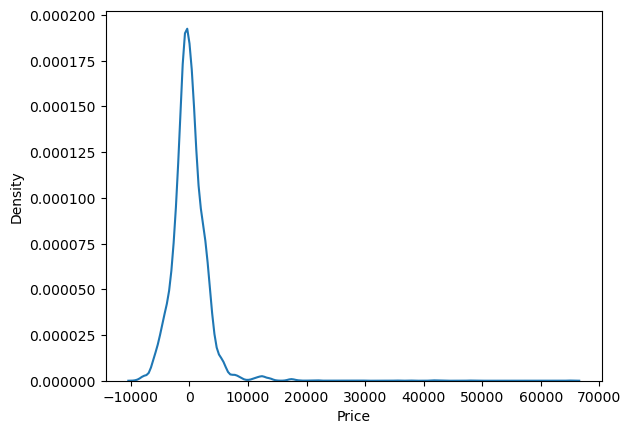

In [611]:
# Normally distribution of Errors:
sns.kdeplot(error_Train)


<Axes: ylabel='Price'>

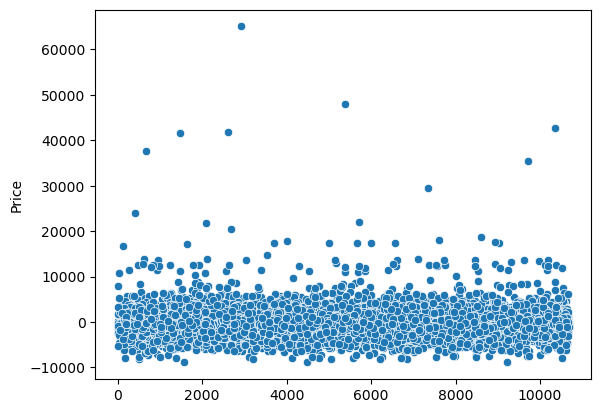

In [612]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error_Train)


# On Test Data

In [613]:
y_Test_pred = linearRegression.predict(X_test)
y_Test_pred


array([13982.96310223,  3835.30513982,  5028.2326979 , ...,
       11840.26874152, 10941.49147605, 11202.72687625])

In [614]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',metrics.mean_squared_error(y_test,y_Test_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_Test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_Test_pred)))


MSE: 9197545.736153575
MAE: 2066.298800423049
RMSE: 3032.7455772210064


In [615]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score
r2 = metrics.r2_score(y_test,y_Test_pred)
score = r2
## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('r2  : ',r2)
print('aR2 : ', aR2)


r2  :  0.5444667083952239
aR2 :  0.5389571136733471


In [616]:
error = (y_test-y_Test_pred)
error


2150     4013.036898
3784       37.694860
714      -566.232698
7558      903.944860
7413       91.135674
            ...     
653      2468.118118
8607    -1814.320779
10260    -213.268742
10580   -4146.491476
5285     2174.273124
Name: Price, Length: 2093, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

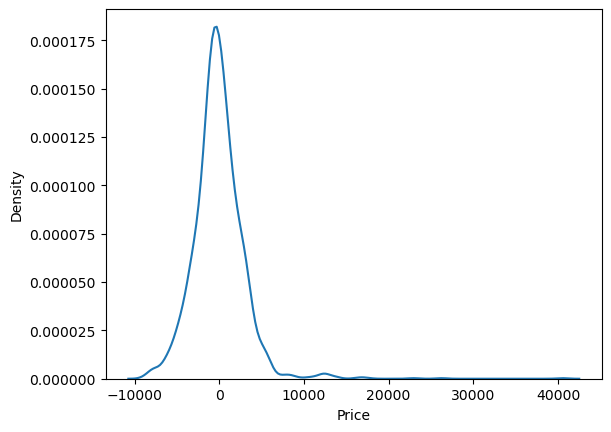

In [617]:
# Normally distribution of Errors:
sns.kdeplot(error)


<Axes: ylabel='Price'>

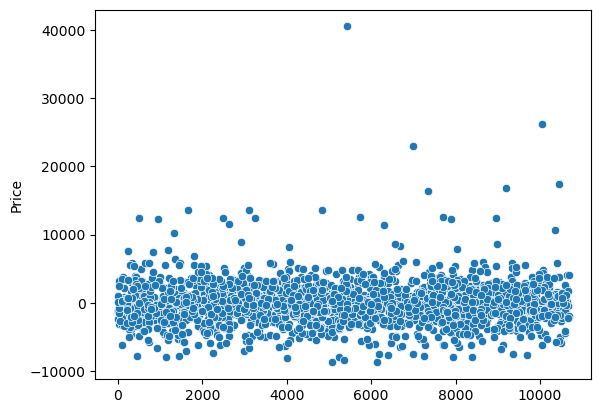

In [618]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error)


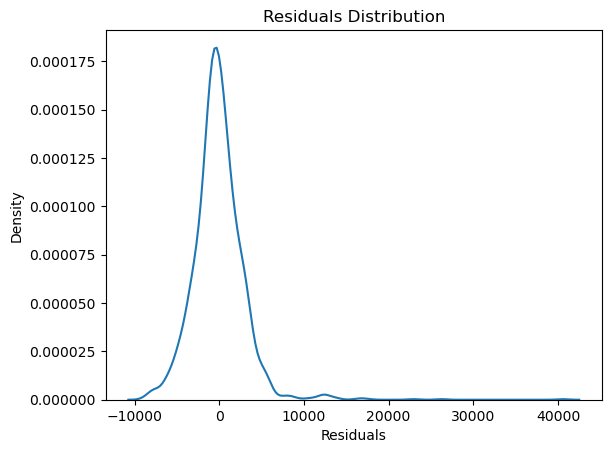

In [619]:
# Calculate residuals
residuals = y_test - y_pred
residuals = residuals.astype(float)
# Create a kernel density plot (KDE) for the residuals
sns.kdeplot(residuals)

# You can also add labels and a title to the plot for better understanding
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals Distribution")

# Display the plot
plt.show()


In [620]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linearRegression, file)

print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


In [621]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



In [622]:
import numpy as np

# Your test data
X_test_01 = np.array([[0.29513, -0.439141, -0.139609, -0.488058, 1.340918, -0.356351, 
                      -0.290428, -0.010932, -0.224335, -0.192486, -0.837887, -0.612842, 
                      -0.269325, -0.837887, 1.932945, -0.269325, -0.192486, -0.889078, 
                      -1.468318, 0, -1.290458, -1.290458, -0.778862, -0.594844, 1.650211]])


# Make predictions using the loaded model
predictions = loaded_model.predict(X_test_01)

# Print the predictions
print("Predictions:", predictions)


Predictions: [2.20860425e+09]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'random':RandomForestRegressor(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'random':[],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    
    plt.figure(figsize=(8,8))
    scatter_color = 'red'
    sns.scatterplot(y_test,y_pred,color=scatter_color)
    plt.xlabel("Test Truth Data")
    plt.ylabel("Test Predicted Data")
    plt.show()
    print()
    print()
    residuals = y_test-y_pred
    residuals = residuals.astype(float)

    plt.figure(figsize=(8,8))
    
    sns.kdeplot(residuals)
    
    plt.show()
    print()
    plt.figure(figsize=(8,8))
    sns.scatterplot(y_pred,residuals)
    plt.show()

    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)

    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)



In [ ]:

models_value=pd.DataFrame(modelDictWithDetails)
models_value
